In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

將獲得的資料整理成一個dictionary方便之後擷取

In [5]:
with open('F:\\Project\\data\\CLAIM.csv') as data:
    raw_data = csv.reader(data)
    header = next(raw_data)
    data = {}
    
    for i in range(len(header)):
        data[header[i]] = []
    
    while True:
        try:
            row = next(raw_data)
            for i in range(len(row)):
                if row[i] == '':
                    row[i] = 0
                data[header[i]].append(row[i])
        except:
            break    

取出年齡段來看宇再購保單之間的關係

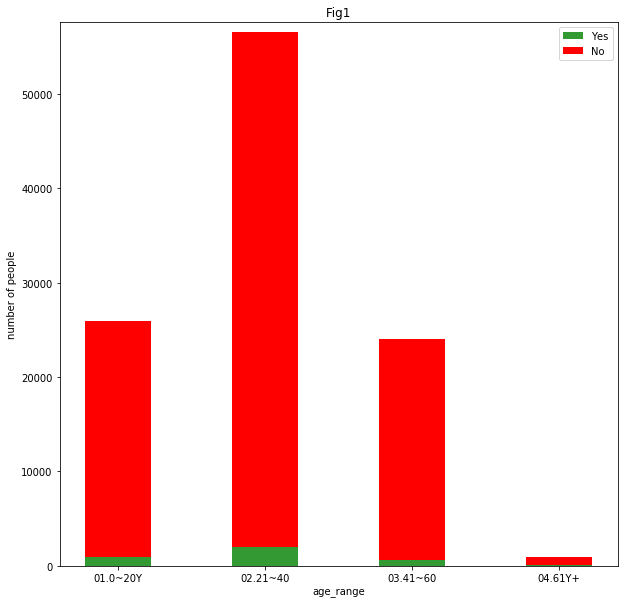

再購人數：
[('01.0~20Y', 983), ('02.21~40', 2014), ('03.41~60', 603), ('04.61Y+', 37)]
買保險的總人數： 
[('01.0~20Y', 25953), ('02.21~40', 56623), ('03.41~60', 24051), ('04.61Y+', 984)]
每個年齡段的再購比例
[('01.0~20Y', '0.038'), ('02.21~40', '0.036'), ('03.41~60', '0.025'), ('04.61Y+', '0.038')]


In [13]:
age_range = {}
n_age_range = {}
for i in range(len(data[header[0]])):
        if data['TYPE_CODE'][i] != 0:
            if data[header[2]][i] not in age_range:
                age_range[data[header[2]][i]] = 1
            else:
                age_range[data[header[2]][i]] += 1
        else:
            if data[header[2]][i] not in n_age_range:
                n_age_range[data[header[2]][i]] = 1
            else:
                n_age_range[data[header[2]][i]] += 1

age_range = sorted(age_range.items())
n_age_range = sorted(n_age_range.items())

fig = plt.figure(figsize = (10, 10))
x = range(len(age_range))
y_num = [item[1] for item in age_range]
n_num = [item[1] for item in n_age_range]
rects1 = plt.bar(x, height = y_num, width = 0.45, alpha = 0.8, color = 'green', label = "Yes")
rects2 = plt.bar(x, height = n_num, width = 0.45, color = 'red', label="No", bottom = y_num)
plt.ylim(0, np.max(y_num) + np.max(n_num) + 1000)
plt.ylabel("number of people")
plt.xticks(x, [item[0] for item in age_range])
plt.xlabel("age_range")
plt.title("Fig1")
plt.legend()
plt.show()
ratios = []
total = []
for i in range(len(age_range)):
    ratio = age_range[i][1] / (age_range[i][1] + n_age_range[i][1])
    ratio = "%0.3f" % ratio
    total.append((age_range[i][0], age_range[i][1] + n_age_range[i][1]))
    ratios.append((age_range[i][0], ratio))
print('再購人數：')
print(age_range)
print('買保險的總人數： ')
print(total)
print('每個年齡段的再購比例')
print(ratios)

從每個年齡段的再購比例來看，看不太出和再購有甚麼關係，但從直方圖可以推測保險公司是不太賣保險給60歲以上的人，而青壯年是主要的客群，所以我覺得可以分年齡段來分析每個階段的再購的人具有甚麼特徵。